# Independent Lab: Inferential Statistics

In this assignment you will practice implementing statistical approaches in Python. For this assignment, please complete the following tasks using the [ect_data.txt](/data/ect_data.txt) dataset. 

## Linear and Multiple Regression

* Using `intent1_01` as the target variable, create a regression model using only 5 of the other numerical variables
  * Do not include `intent1_02`, `intent1_03`, and `intent1_04` as independent variables
* Assess the validity of the assumptions of 
  * linearity,
  * collinearity,
  * homoscedasticity,
  * independence,
  * and normality.
* Assess your model's *F*-test and *t*-tests. 
  * Which variables are significant? Based on what assessment? 
  * Choose two significant variables. From a business perspective, why are they significant?
* Provide the equation for your model and interpret the results.

**Save your notebook with output showing your code has been successfully executed and then submit for grading.**

---

#### Notebook Setup

In [2]:
# load modules
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import scipy.stats as sts # for QQ plot

from scipy.stats import pearsonr # correlation p-values
from sklearn.linear_model import LinearRegression # regression output
import statsmodels.formula.api as smf # ols regression

In [3]:
# set working directory
os.chdir("/Users/obn/Documents/GitHub/UM-BGEN632/week9labs/data")  # change this to your filepath
os.getcwd()  # confirm change

'/Users/obn/Documents/GitHub/UM-BGEN632/week9labs/data'

In [4]:
# load data and do quick inspect
ect_df = pd.read_table('ect_data.txt', sep='\t')
ect_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   attitude1_01  201 non-null    int64
 1   attitude1_02  201 non-null    int64
 2   attitude1_03  201 non-null    int64
 3   attitude1_04  201 non-null    int64
 4   intent1_01    201 non-null    int64
 5   intent1_02    201 non-null    int64
 6   intent1_03    201 non-null    int64
 7   intent1_04    201 non-null    int64
 8   peruse01      201 non-null    int64
 9   peruse02      201 non-null    int64
 10  peruse03      201 non-null    int64
 11  peruse04      201 non-null    int64
 12  satis01       201 non-null    int64
 13  satis02       201 non-null    int64
 14  satis03       201 non-null    int64
 15  satis04       201 non-null    int64
dtypes: int64(16)
memory usage: 25.3 KB


#### Analysis Overview

Target/response variable: `intent1_01`

Selected predictor variables: 
* `attitude1_03`
* `attitude1_04`
* `peruse03`
* `peruse04`
* `satis02`

#### Create Model

In [6]:
lin_reg_1 = LinearRegression(fit_intercept=True)
lin_reg_1.fit(ect_df[['attitude1_04', 'attitude1_03', 'peruse03', 'peruse04', 'satis02']], ect_df.intent1_01)

LinearRegression()

#### Check Model Assumptions

##### Linearity

In the next two code cells, we create a series of scatterplots to assess linearity. The first cell demonstrates creation of scatterplots with separate lines of code. The second cell demonstrates the use of a `for` loop to create the scatterplots.

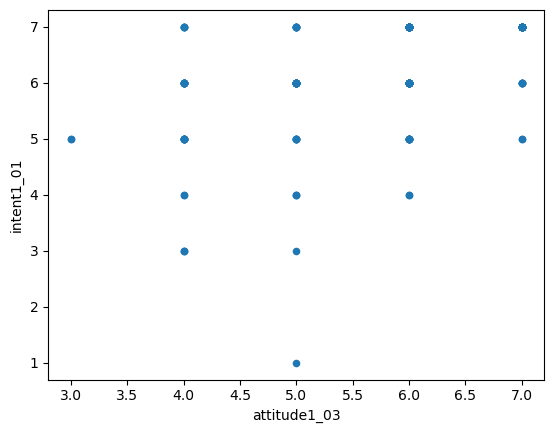

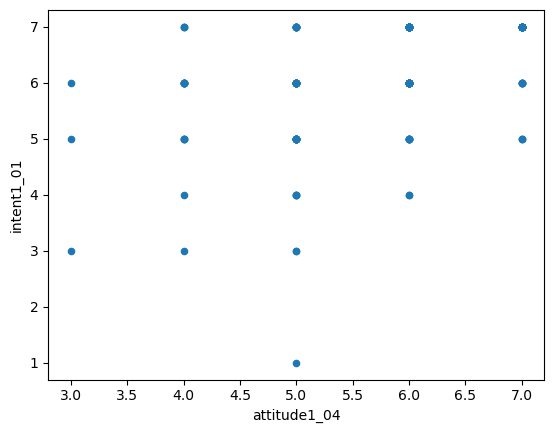

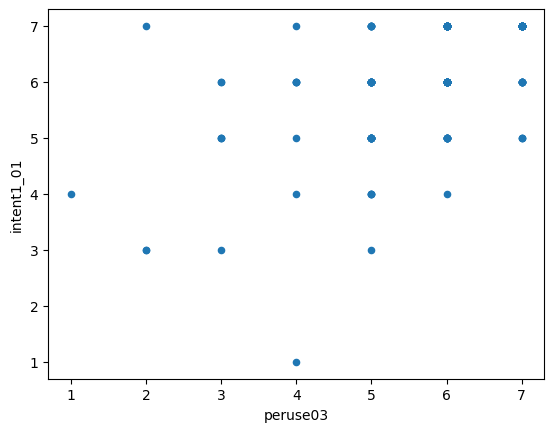

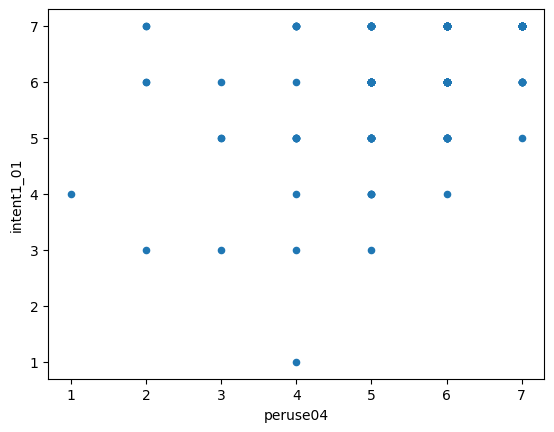

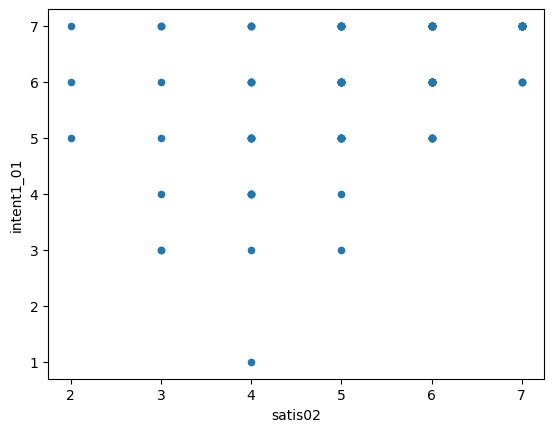

In [8]:
ect_df.plot.scatter(x='attitude1_03', y='intent1_01')
plt.show()

ect_df.plot.scatter(x='attitude1_04', y='intent1_01')
plt.show()

ect_df.plot.scatter(x='peruse03', y='intent1_01')
plt.show()

ect_df.plot.scatter(x='peruse04', y='intent1_01')
plt.show()

ect_df.plot.scatter(x='satis02', y='intent1_01')
plt.show()

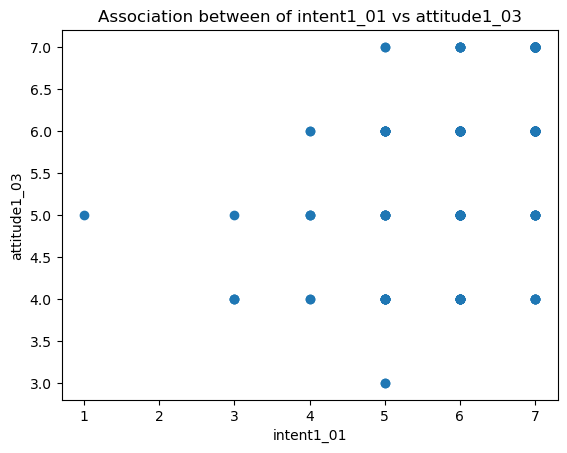

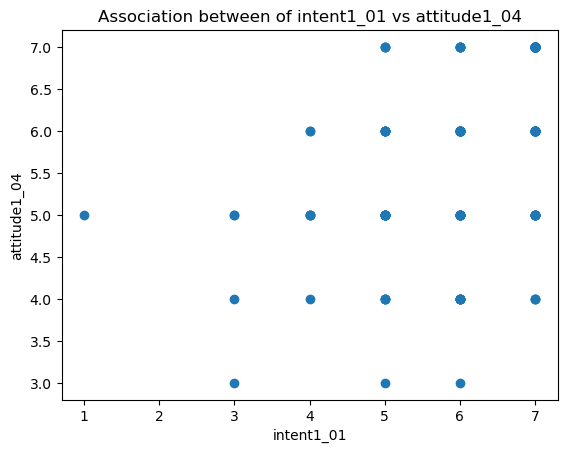

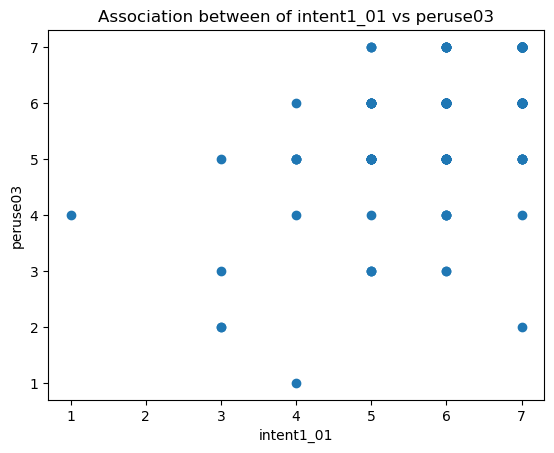

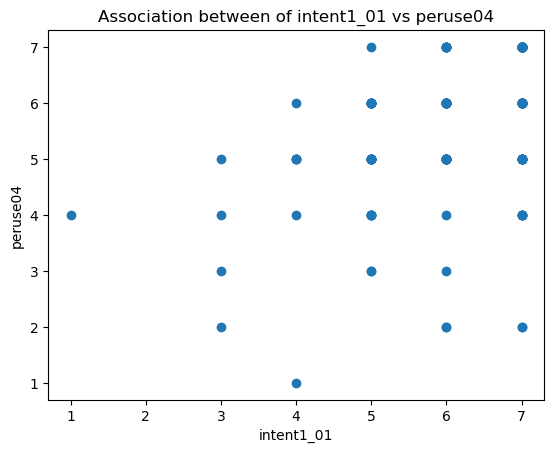

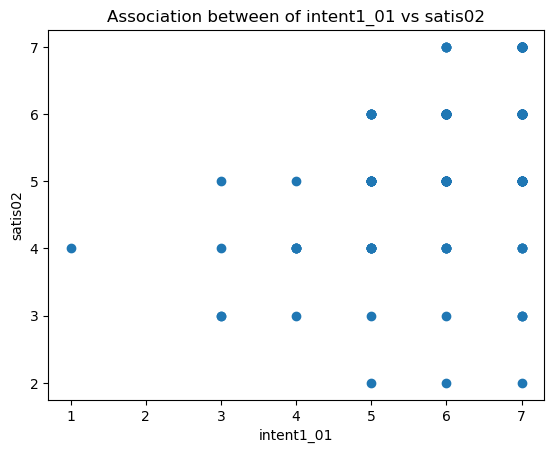

In [9]:
# model variables
mod_vars = ['attitude1_03', 'attitude1_04', 'peruse03', 'peruse04', 'satis02']

# loop for scatterplots
for var in mod_vars:
    plt.figure()  # create a new figure for each plot
    plt.scatter(ect_df[var], ect_df['intent1_01'])  # specify variables
    plt.ylabel('intent1_01')  # label x-axis
    plt.xlabel(var)  # label x-axis
    plt.title(f'Association between of intent1_01 vs {var}')
    plt.show()

In the above scatterplots, we can see a general linear trend between predictors and response variable. Our data meetings the linearity assumption.

##### Collinearity

In the code cell below, we compute the variance inflation factor for our predictor variables to assess multicollinearity. We will use the regression object created earlier in the notebook for this task.

In [12]:
# calculate VIF
lin_reg_1.fit(ect_df[['attitude1_04','peruse03', 'peruse04', 'satis02']], ect_df.attitude1_03)
vif_1 = 1/(1 - lin_reg_1.score(ect_df[['attitude1_04','peruse03', 'peruse04', 'satis02']], ect_df.attitude1_03))

lin_reg_1.fit(ect_df[['attitude1_03', 'peruse03', 'peruse04', 'satis02']], ect_df.attitude1_04)
vif_2 = 1/(1 - lin_reg_1.score(ect_df[['attitude1_03', 'peruse03', 'peruse04', 'satis02']], ect_df.attitude1_04))

lin_reg_1.fit(ect_df[['attitude1_03', 'attitude1_04', 'peruse04', 'satis02']], ect_df.peruse03)
vif_3 = 1/(1 - lin_reg_1.score(ect_df[['attitude1_03', 'attitude1_04', 'peruse04', 'satis02']], ect_df.peruse03))

lin_reg_1.fit(ect_df[['attitude1_03', 'attitude1_04','peruse03', 'satis02']],ect_df.peruse04)
vif_4 = 1/(1 - lin_reg_1.score(ect_df[['attitude1_03', 'attitude1_04','peruse03', 'satis02']], ect_df.peruse04))

lin_reg_1.fit(ect_df[['attitude1_03', 'attitude1_04', 'peruse03', 'peruse04']],ect_df.satis02)
vif_5 = 1/(1 - lin_reg_1.score(ect_df[['attitude1_03', 'attitude1_04', 'peruse03', 'peruse04']], ect_df.satis02))

#Output VIF scores
print('VIF for attitude1_03: ', vif_1,
      '\nVIF for attitude1_04: ', vif_2,
      '\nVIF for peruse03: ', vif_3,
      '\nVIF for peruse04: ', vif_4,
      '\nVIF for satis02: ', vif_5)


VIF for attitude1_03:  4.115331526215196 
VIF for attitude1_04:  3.926057532613201 
VIF for peruse03:  3.2742537092504977 
VIF for peruse04:  3.0213371642409723 
VIF for satis02:  1.5135711989579002


A good VIF value is below 5. The VIF values for our predictors are below this threshold. Our data meets the multicollinearity assumption.

##### Homoscedasticity

In the code cell below, we create a plot to visualizing residual values against predicted/fitted values to assess homoscedasticity.

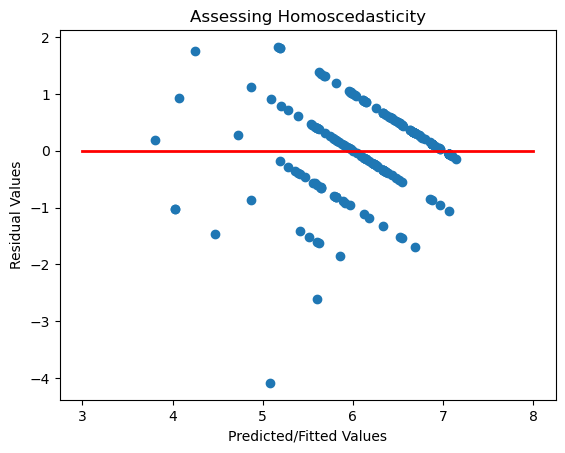

In [15]:
lin_reg_2 = smf.ols('intent1_01 ~ attitude1_03 + attitude1_04 + peruse03 + peruse04 + satis02', ect_df).fit()

plt.scatter(lin_reg_2.fittedvalues, lin_reg_2.resid)
plt.xlabel('Predicted/Fitted Values')
plt.ylabel('Residual Values')
plt.title('Assessing Homoscedasticity')
plt.plot([3, 8],[0, 0], 'red', lw=2)  # add red horizontal line
plt.show()

Based on the plot above, we can see that there is a potential outlier present in the data. Besides this data point, no other issues are readily apparent; the variance appears relatively constant.

##### Independence

In the code cell below, we output the linear regression model summary to assess independence of residuals. We will specifically check out the Durbin-Watson test statistic.

In [18]:
lin_reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             intent1_01   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     31.12
Date:                Fri, 02 May 2025   Prob (F-statistic):           3.21e-23
Time:                        15:32:13   Log-Likelihood:                -229.71
No. Observations:                 201   AIC:                             471.4
Df Residuals:                     195   BIC:                             491.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.9601      0.358      5.473      0.000       1.254       2.666
attitude1_03     0.0983      0.103      0.953      0.342      -0.105       0.302
attitude1_04     0.1117      0.107      1.044      0.298      -0.099       0.323
peruse03         0.3700      0.085      4.336      0.000       0.202       0.538
peruse04        -0.0386      0.078     -0.493      0.622      -0.193       0.116
satis02          0.1873      0.058      3.245      0.001       0.073       0.301
==============================================================================
Omnibus:                       51.362   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.989
Skew:                          -0.990   Prob(JB):                     6.09e-39
Kurtosis:                       7.135   Cond. No.                         86.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The test statistic is `2.025` which is within the range of acceptable values. Our data meetings the independence of residuals assumptions.

##### Normality

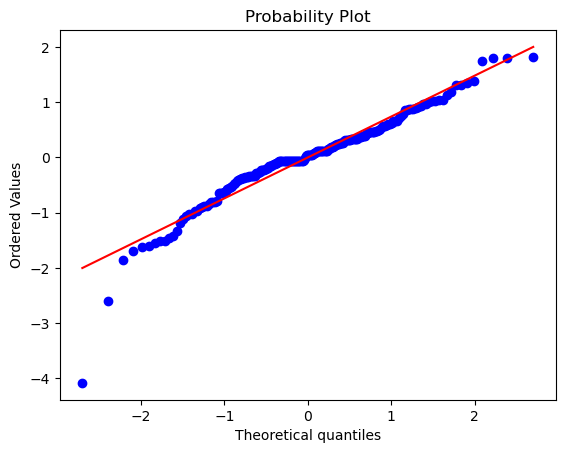

In [21]:
sts.probplot(lin_reg_2.resid, dist="norm", plot=plt)
plt.show()

The output confirms the results of the homoscedasticity assessment: an outlier is present in the data. Outside of that single outlier, the data is normal. Our data meets the assumption of normality.

#### Assess F-test and t-test Statistics

We will now assess the predictive power of our overall model and model terms using the F-test and t-test, respectively. We will once more output our model summary for this assessment.

In [23]:
lin_reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             intent1_01   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     31.12
Date:                Fri, 02 May 2025   Prob (F-statistic):           3.21e-23
Time:                        15:32:13   Log-Likelihood:                -229.71
No. Observations:                 201   AIC:                             471.4
Df Residuals:                     195   BIC:                             491.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.9601      0.358      5.473      0.000       1.254       2.666
attitude1_03     0.0983      0.103      0.953      0.342      -0.105       0.302
attitude1_04     0.1117      0.107      1.044      0.298      -0.099       0.323
peruse03         0.3700      0.085      4.336      0.000       0.202       0.538
peruse04        -0.0386      0.078     -0.493      0.622      -0.193       0.116
satis02          0.1873      0.058      3.245      0.001       0.073       0.301
==============================================================================
Omnibus:                       51.362   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.989
Skew:                          -0.990   Prob(JB):                     6.09e-39
Kurtosis:                       7.135   Cond. No.                         86.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Overall Model

The *F*-statistic `31.12` is highly significant with a *p*-value of `3.21e-23` (*p* = .0000000000000000000000321). This means that the overall model is significant; at least one of the predictor variables is significant.


##### Model Terms

Looking at the *t*-test statistics and corresponding *p*-values for predictor variables, we observe that only two of them are significant: `peruse03` and `satis02`. 

To answer the second question, we need to understand the context of the data collected. 

The variable `peruse03` represents perceived usefulness of a new system within an organization. This makes sense because if an employee does not perceive the new system to be useful, it will not help them perform their job; they will not use it.

The variable `satis02` represents the satisfaction of using a new system within an organization. This makes sense because if an employee is not satisfied with the use of the new system, it will not help them perform their job; they will not use it.

##### Equation

The equation for the model is based on significant variables, or model terms. We will use the coefficients for model intercept and significant terms to construct the equation:

*intention to use* = 1.96 + 0.19 *satis02* + 0.37 *peruse03*

The interpretation of the equation is as follows:
* For every unit increase in *perceived usefulness*, an employee will be willing to use the system by 0.37.
* For every unit increase in *satisfaction*, employees will be more willing to use the system by 0.19.

We can see from this that usefulness is more important than satisfaction in determining intent to use the system.

In [36]:
print(lin_reg_1)

LinearRegression()
